In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# 데이터셋 로드
# mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

# train, test 데이터셋 분리
(image_train, label_train), (image_test, label_test) = fashion_mnist.load_data()

# 이미지 색상 정규화를 위해 255로 나눔
image_train, image_test = image_train/255.0, image_test/255.0

class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

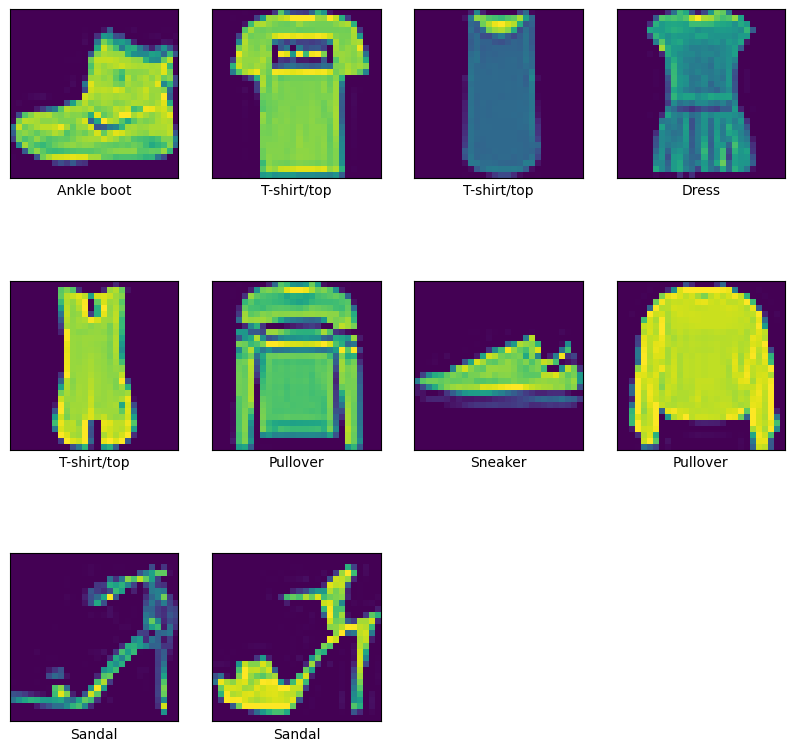

In [18]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i])
    plt.xlabel(class_names[label_train[i]])
plt.show()


In [19]:
# 모델 구성 : CNN without batch

model1 = Sequential()
model1.add(Conv2D(32,(2,2), activation='sigmoid', input_shape=(28,28,1)))
model1.add(Conv2D(64,(2,2), activation='sigmoid'))
model1.add(Conv2D(128,(2,2),2, activation='sigmoid'))
model1.add(Conv2D(32,(2,2), activation='sigmoid'))
model1.add(Conv2D(64,(2,2), activation='sigmoid'))
model1.add(Conv2D(128,(2,2),2, activation='sigmoid'))
model1.add(Flatten())
model1.add(Dense(128,activation='sigmoid'))
model1.add(Dense(10,activation='softmax'))

In [20]:
model1.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])

history = model1.fit(image_train, label_train, validation_data=(image_test, label_test),epochs=10, batch_size=10)
model1.summary()
model1.save('fashion_cnn_nobatch.h5')
with open('historynoBatch', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.0996 - loss: 2.3223 - val_accuracy: 0.1000 - val_loss: 2.3166
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.1005 - loss: 2.3135 - val_accuracy: 0.1000 - val_loss: 2.3094
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.1023 - loss: 2.3135 - val_accuracy: 0.1000 - val_loss: 2.3223
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.1000 - loss: 2.3140 - val_accuracy: 0.1000 - val_loss: 2.3116
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.0991 - loss: 2.3137 - val_accuracy: 0.1000 - val_loss: 2.3264
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.0993 - loss: 2.3142 - val_accuracy: 0.1000 - val_loss: 2.3166
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.1012 - loss: 2.3139 - val_accuracy: 0.1000 - val_loss: 2.3161
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.0995 - loss: 2

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
model = tf.keras.models.load_model('fashion_cnn_nobatch.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [4 4 4 4 4 4 4 4 4 4]


In [22]:
# 모델 구성 : CNN with batch

model2 = Sequential()
model2.add(Conv2D(32,(2,2), activation='sigmoid', input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(2,2), activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(2,2),2, activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Conv2D(32,(2,2), activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(2,2), activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(2,2),2, activation='sigmoid'))
model2.add(Flatten())
model2.add(Dense(128,activation='sigmoid'))
model2.add(Dense(10,activation='softmax'))

In [23]:
model2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])

history = model2.fit(image_train, label_train, validation_data=(image_test, label_test),epochs=10, batch_size=10)
model2.summary()
model2.save('fashion_cnn_batch.h5')
with open('historyBatch', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 149s 24ms/step - accuracy: 0.7640 - loss: 0.6838 - val_accuracy: 0.8384 - val_loss: 0.4410
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 148s 25ms/step - accuracy: 0.8694 - loss: 0.3624 - val_accuracy: 0.8702 - val_loss: 0.3590
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 140s 23ms/step - accuracy: 0.8885 - loss: 0.3110 - val_accuracy: 0.8858 - val_loss: 0.3212
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 120s 20ms/step - accuracy: 0.8986 - loss: 0.2775 - val_accuracy: 0.8750 - val_loss: 0.3303
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 98s 16ms/step - accuracy: 0.9047 - loss: 0.2621 - val_accuracy: 0.8947 - val_loss: 0.2895
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.9088 - loss: 0.2449 - val_accuracy: 0.8974 - val_loss: 0.2916
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 77s 13ms/step - accuracy: 0.9168 - loss: 0.2295 - val_accuracy: 0.8940 - val_loss: 0.2875
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 74s 12ms/step - accuracy: 0.92

KeyboardInterrupt: 

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
model = tf.keras.models.load_model('fashion_cnn_batch.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [9 0 0 3 0 2 7 2 5 5]


In [5]:
# 모델 구성 : CNN with relu

model3 = Sequential()
model3.add(Conv2D(32,(2,2), activation='relu', input_shape=(28,28,1)))
model3.add(Conv2D(64,(2,2), activation='relu'))
model3.add(Conv2D(128,(2,2),2, activation='relu'))
model3.add(Conv2D(32,(2,2), activation='relu'))
model3.add(Conv2D(64,(2,2), activation='relu'))
model3.add(Conv2D(128,(2,2),2, activation='relu'))
model3.add(Flatten())
model3.add(Dense(128,activation='sigmoid'))
model3.add(Dense(10,activation='softmax'))

/home/ubuntu/workspace/DL/ai_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-30 14:26:24.682698: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
model3.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])

history = model3.fit(image_train, label_train, validation_data=(image_test, label_test),epochs=10, batch_size=10)
model3.save('fashion_cnn_batchrelu.h5')
model3.summary()
with open('historyBatchReLu', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
model = tf.keras.models.load_model('fashion_cnn_batchrelu.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [9 0 3 3 3 2 7 2 5 5]


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
historyNoBatch = pickle.load(open('./historynoBatch', "rb"))
historyBatch = pickle.load(open('./historyBatch', "rb"))
historylelu = pickle.load(open('./historyBatchReLu', "rb"))
val_accNB = historyNoBatch["val_accuracy"]
val_lossNB= historyNoBatch["val_loss"]
val_lossB = historyBatch["val_loss"]
val_accB = historyBatch["val_accuracy"]
val_lossL = historylelu["val_loss"]
val_accL = historylelu["val_accuracy"]

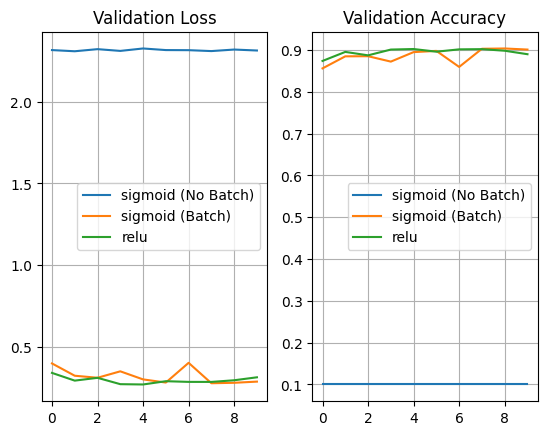

In [3]:
plt.subplot(1,2,1)
plt.title('Validation Loss')
plt.plot(range(len(val_lossNB)),val_lossNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_lossB)),val_lossB,label = "sigmoid (Batch)")
plt.plot(range(len(val_lossL)),val_lossL,label = "relu")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Accuracy')
plt.plot(range(len(val_accNB)),val_accNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_accB)),val_accB,label = "sigmoid (Batch)")
plt.plot(range(len(val_accL)),val_accL,label = "relu")
plt.grid()
plt.legend()

plt.savefig("Summary.png")
plt.show()
